In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [3]:
df = pd.read_csv("TOTAL_immoweb_data_cleaned.csv")
df.head()

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province,Region,Property_Size
0,685000,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital,Bruxelles-Capital,Large
1,289000,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3,120.0,0,1.0,0.0,0.0,2.0,0.0,1.0,Koekelare,West Flanders,Flanders,Large
2,259000,5030,HOUSE,HOUSE,GOOD,3,154.0,0,0.0,1.0,200.0,3.0,0.0,0.0,Gembloux,Namur,Wallonia,Large
3,429210,9052,APARTMENT,APARTMENT,GOOD,2,100.0,1,1.0,0.0,0.0,3.0,0.0,1.0,Gent,East Flanders,Flanders,Medium
4,314000,1770,APARTMENT,APARTMENT,GOOD,2,96.0,1,1.0,0.0,0.0,4.0,0.0,1.0,Liedekerke,Flemish Brabant,Flanders,Medium


### **Represent the number of properties according to their surface using a histogram**

C:\Users\fomic\AppData\Local\Temp\ipykernel_30284\942239093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property_Size', data=df, order=size_bins_labels, palette='muted')


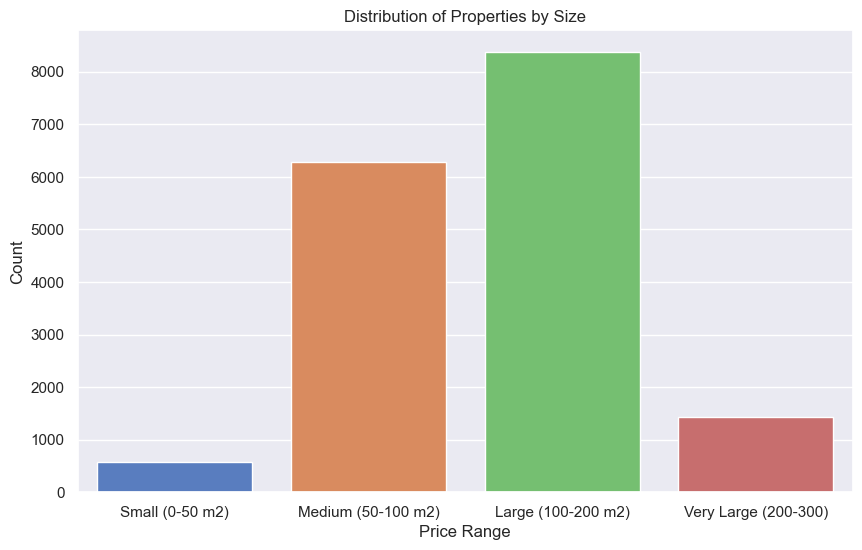

In [4]:
# histrogram for Surface_area_plot_of_land
size_bins = [0,50,100,200,300]
size_bins_labels = ["Small (0-50 m2)","Medium (50-100 m2)","Large (100-200 m2)","Very Large (200-300)"]
df["Property_Size"] = pd.cut(df['Living_Area'],bins=size_bins,labels=size_bins_labels)

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Property_Size', data=df, order=size_bins_labels, palette='muted')
plt.title('Distribution of Properties by Size')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [55]:
# create new column for price per square meter
df['Price_sqm'] = df['Price'] / df['Living_Area']

In [56]:
# most & less expensive municipalities in Belgium by average price/square meter
df.groupby('Municipality')['Price_sqm'].agg('mean').sort_values() 

Municipality
Vaux-sur-Sûre     657.894737
Viroinval         788.778838
Quévy             802.554273
Alveringem        840.796020
Brunehaut         866.700201
                    ...     
Kraainem         4463.783814
Ixelles          4563.295488
Leuven           4757.275917
Nieuwpoort       4782.202240
Knokke-Heist     7464.102771
Name: Price_sqm, Length: 543, dtype: float64

### What are the **most** expensive municipalities in Belgium?  
(Average price, median price, price per square meter)

In [57]:
# most expensive municipalities in Belgium
most_expensive = df.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmax()
most_expensive 

'Knokke-Heist'

In [58]:
filt = df['Municipality'] == most_expensive 

average = df[filt]['Price'].mean()
median = df[filt]['Price'].median()
price_sqm = df[filt]['Price_sqm'].mean()

print(f'The most expensive municipalities in Belgium is {most_expensive}.')
print(f'Average price : {average}, median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Belgium is Knokke-Heist.
Average price : 601451.5513392857, median :599000.0   price per square meter : 7464.102771066597


### What are the **less** expensive municipalities in Belgium?  
(Average price, median price, price per square meter)

In [59]:
# less expensive municipalities in Belgium
less_expensive = df.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

'Vaux-sur-Sûre'

In [60]:
filt = df['Municipality'] == less_expensive 

average = df[filt]['Price'].mean()
median = df[filt]['Price'].median()
price_sqm = df[filt]['Price_sqm'].mean()

print(f'The less expensive municipalities in Belgium is {less_expensive}.')
print(f'Average price : {average}, median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Belgium is Vaux-sur-Sûre.
Average price : 125000.0, median :125000.0   price per square meter : 657.8947368421053


### What are the most & less expensive municipalities in Brussels?  
(Average price, median price, price per square meter)

In [61]:
# most expensive municipalities in Brussels

filt1 = df['Province'] == 'Brussels Capital'

df_bruxelles = df[filt1]

most_expensive = df_bruxelles.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_bruxelles['Municipality'] == most_expensive 

average = df_bruxelles[filt2]['Price'].mean()
median = df_bruxelles[filt2]['Price'].median()
price_sqm = df_bruxelles[filt2]['Price_sqm'].mean()

print(f'The most expensive municipalities in Brussels is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Brussels is Ixelles.
Average price : 458077.51937984495 , median :415000.0   price per square meter : 4563.295488411992


In [62]:
# less expensive city municipalities in Brussels

less_expensive = df_bruxelles.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_bruxelles['Municipality'] == less_expensive 

average = df_bruxelles[filt3]['Price'].mean()
median = df_bruxelles[filt3]['Price'].median()
price_sqm = df_bruxelles[filt3]['Price_sqm'].mean()

print(f'The less expensive municipalities in Brussels is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Brussels is Molenbeek-Saint-Jean.
Average price : 264723.60355029587 , median :239000.0   price per square meter : 2796.302078001672


### What are the **most** expensive municipalities in Wallonia?  
(Average price, median price, price per square meter)

In [63]:
# most expensive municipalities in Wallonia

filt1 = df['Region'] == 'Wallonia'

df_wallonia = df[filt1]

most_expensive = df_wallonia.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_wallonia['Municipality'] == most_expensive 

average = df_wallonia[filt2]['Price'].mean()
median = df_wallonia[filt2]['Price'].median()
price_sqm = df_wallonia[filt2]['Price_sqm'].mean()

print(f'The most expensive municipalities in Wallonia is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Wallonia is Lasne.
Average price : 395000.0 , median :395000.0   price per square meter : 4030.612244897959


### What are the **less** expensive municipalities in Wallonia?  
(Average price, median price, price per square meter)

In [64]:
# less expensive city municipalities in Wallonia

less_expensive = df_wallonia.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_wallonia['Municipality'] == less_expensive 

average = df_wallonia[filt3]['Price'].mean()
median = df_wallonia[filt3]['Price'].median()
price_sqm = df_wallonia[filt3]['Price_sqm'].mean()

print(f'The less expensive municipalities in Wallonia is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Wallonia is Vaux-sur-Sûre.
Average price : 125000.0 , median :125000.0   price per square meter : 657.8947368421053


### What are the **most** expensive municipalities in Flanders?  
(Average price, median price, price per square meter)

In [76]:
# NEW TEST
# most expensive city in Flanders

filt1 = df['Region'] == 'Flanders'

df_flanders = df[filt1]

most_expensive = df_flanders.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_flanders['Municipality'] == most_expensive 

average = df_flanders[filt2]['Price'].mean()
median = df_flanders[filt2]['Price'].median()
price_sqm = df_flanders[filt2]['Price_sqm'].mean()

print(f'The most expensive municipalities in Flanders is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Flanders is Knokke-Heist.
Average price : 601451.5513392857 , median :599000.0   price per square meter : 7464.102771066597


In [69]:
# most expensive municipalities in Flanders

filt1f = df['Region'] == 'Flanders'

df_flanders = df[filt1f]

most_expensive = df_flanders.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_flanders['Municipality'] == most_expensive 

average = df_flanders[filt2]['Price'].mean()
median = df_flanders[filt2]['Price'].median()
price_sqm = df_flanders[filt2]['Price_sqm'].mean()

print(f'The most expensive municipalities in Flanders is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Flanders is Knokke-Heist.
Average price : 601451.5513392857 , median :599000.0   price per square meter : 7464.102771066597


### What are the **less** expensive municipalities in Flanders?  
(Average price, median price, price per square meter)

In [79]:
# NEW TEST

# Filter data for Flanders region
flanders_data = df[df['Region'] == 'Flanders']

# Compute necessary statistics
flanders_stats = (
    flanders_data
    .groupby('Municipality')
    .agg(
        Average_Price=('Price', 'mean'),
        Median_Price=('Price', 'median'),
        Average_Price_per_Sqm=('Price', lambda x: (x / flanders_data.loc[x.index, 'Living_Area']).mean())
    )
    .reset_index()
)

# Sort by average price
sorted_flanders_stats = flanders_stats.sort_values(by='Average_Price', ascending=True)

# Display the least expensive municipalities
print(sorted_flanders_stats.head(10))  # Top 10 least expensive


     Municipality  Average_Price  Median_Price  Average_Price_per_Sqm
68       Glabbeek  155000.000000      155000.0            1131.386861
5      Alveringem  169000.000000      169000.0             840.796020
139    Lo-Reninge  172000.000000      172000.0            1054.429171
169  Oostrozebeke  212811.166667      167450.0            1750.447435
152         Menen  223907.435897      179000.0            1495.619784
8         Ardooie  230914.000000      199000.0            1979.967068
95       Ichtegem  233642.857143      249000.0            2001.193453
107   Kluisbergen  239718.750000      249500.0            1761.440702
224        Wervik  244153.846154      245000.0            1789.446378
98         Izegem  246730.126582      249000.0            1934.107566


In [70]:
less_expensive = df_flanders.groupby('Municipality')['Price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3f = df_flanders['Municipality'] == less_expensive 

average = df_flanders[filt3f]['Price'].mean()
median = df_flanders[filt3f]['Price'].median()
price_sqm = df_flanders[filt3f]['Price_sqm'].mean()

print(f'The less expensive municipalities in Flanders is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Flanders is Alveringem.
Average price : 169000.0 , median :169000.0   price per square meter : 840.7960199004975


# Real Estate Prices in Belgium

| Region    | Municipality           | Type             | Average Price (EUR) | Median Price (EUR) | Price per Square Meter (EUR) |
|-----------|------------------------|------------------|---------------------|--------------------|------------------------------|
| Belgium   | Knokke-Heist           | Most Expensive   | 601,451.55          | 599,000.00         | 7,464.10                     |
| Belgium   | Vaux-sur-Sûre          | Least Expensive  | 125,000.00          | 125,000.00         |   657.89                     |
| Wallonia  | Lasne                  | Most Expensive   | 395,000.00          | 395,000.00         | 4,030.61                     |
| Wallonia  | Vaux-sur-Sûre          | Least Expensive  | 125,000.00          | 125,000.00         |   657.89                     |
| Flanders  | Knokke-Heist           | Most Expensive   | 601,451.55          | 599,000.00         | 7,464.10                     |
| Flanders  | Alveringem             | Least Expensive  | 169,000.00          | 169,000.00         |   840.79                     |
| Brussels  | Ixelles                | Most Expensive   | 458,077.52          | 415,000.00         | 4,563.30                     |
| Brussels  | Molenbeek-Saint-Jean   | Least Expensive  | 264,723.60          | 239,000.00         | 2,796.30                     |

In [3]:
import pandas as pd

# Data: Real Estate Prices in Belgium
data = {
    "Region": ["Belgium", "Belgium", "Wallonia", "Wallonia", "Flanders", "Flanders", "Brussels", "Brussels"],
    "Municipality": [
        "Knokke-Heist", "Vaux-sur-Sûre", "Lasne", "Vaux-sur-Sûre", 
        "Knokke-Heist", "Alveringem", "Ixelles", "Molenbeek-Saint-Jean"
    ],
    "Type": [
        "Most Expensive", "Least Expensive", "Most Expensive", "Least Expensive", 
        "Most Expensive", "Least Expensive", "Most Expensive", "Least Expensive"
    ],
    "Average Price (EUR)": [
        601451.55, 125000.00, 395000.00, 125000.00, 
        601451.55, 169000.00, 458077.52, 264723.60
    ],
    "Median Price (EUR)": [
        599000.00, 125000.00, 395000.00, 125000.00, 
        599000.00, 169000.00, 415000.00, 239000.00
    ],
    "Price per Square Meter (EUR)": [
        7464.10, 657.89, 4030.61, 657.89, 
        7464.10, 840.79, 4563.30, 2796.30
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


     Region          Municipality             Type  Average Price (EUR)  \
0   Belgium          Knokke-Heist   Most Expensive            601451.55   
1   Belgium         Vaux-sur-Sûre  Least Expensive            125000.00   
2  Wallonia                 Lasne   Most Expensive            395000.00   
3  Wallonia         Vaux-sur-Sûre  Least Expensive            125000.00   
4  Flanders          Knokke-Heist   Most Expensive            601451.55   
5  Flanders            Alveringem  Least Expensive            169000.00   
6  Brussels               Ixelles   Most Expensive            458077.52   
7  Brussels  Molenbeek-Saint-Jean  Least Expensive            264723.60   

   Median Price (EUR)  Price per Square Meter (EUR)  
0            599000.0                       7464.10  
1            125000.0                        657.89  
2            395000.0                       4030.61  
3            125000.0                        657.89  
4            599000.0                       7464.10  
